---
title: Lab 1
jupyter: python3
format:
    html:
        embed-resources: true
---

# Lab 2

### 0.

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/Users/bastiaanweststrate/Desktop/GSB 544/avocado-updated-2020.csv")

### 1.
#### This dataset  contains information of avocade sales in the United States from 2015-2020

#### Some information displayed in the data is 
- date of observation
- The average price of avocado
-The number of avocados sold
- different avocado sizes
-  the total amount of bags sold
- the size of the bags
-  the type of avocado
-  the year
-  where the sales happened

### 2.

In [213]:
df = df.rename(columns={
    "average_price": "Average Price",
    "total_volume": "Total Volume",
    "total_bags": "Total Bags",
    "small_bags": "Small Bags",
    "large_bags": "Large Bags",
    "xlarge_bags": "XLarge Bags",
    "geography": "Geography",
    "year": "Year",
    "type": "Type",
    "date": "Date",
    "4046": "Small 4046",
    "4225": "Medium 4225",
    "4770": "Large 4770"
})
# Remove rows that have missing values
df = df.dropna()

# we cant sell half an avocado/bag so im rounding the those values
cols_to_int = [
    "Total Volume",
    "Small 4046",
    "Medium 4225",
    "Large 4770",
    "Small Bags",
    "Large Bags",
    "XLarge Bags"
]
for col in cols_to_int:
    df[col] = np.ceil(df[col]).astype("int64")

df



,Date,Average Price,Total Volume,Small 4046,Medium 4225,Large 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Type,Year,Geography,geo_type,Month,Day
0,2015-01-04,1.22,40874,2820,28288,50,9716.46,9187,530,0,conventional,2015,Albany,metro,1,4
1,2015-01-04,1.79,1374,58,154,0,1162.65,1163,0,0,organic,2015,Albany,metro,1,4
2,2015-01-04,1.00,435022,364303,23822,83,46815.79,16708,30109,0,conventional,2015,Atlanta,metro,1,4
3,2015-01-04,1.76,3847,1501,939,0,1408.19,1072,337,0,organic,2015,Atlanta,metro,1,4
4,2015-01-04,1.08,788026,53988,552907,39996,141136.68,137147,3991,0,conventional,2015,Baltimore/Washington,metro,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583057,67545,97997,2618,1414878.10,906712,480192,27975,organic,2020,Total U.S.,national,11,29
33041,2020-11-29,0.91,5811115,1352878,589062,19742,3790665.29,2197612,1531531,61525,conventional,2020,West,major_region,11,29
33042,2020-11-29,1.48,289962,13274,19342,637,256709.92,122607,134104,0,organic,2020,West,major_region,11,29
33043,2020-11-29,0.67,822819,234689,80206,10544,497381.96,285765,210809,810,conventional,2020,West Tex/New Mexico,metro,11,29


In [189]:
#(chatgpt help)
national = ['Total U.S.'] 
major_regions = ['West', 'Northeast', 'South Central', 'Southeast', 'Plains', 'Great Lakes', 'Midsouth']
states = ['California', 'Texas', 'Florida', 'New York', 'South Carolina']

def categorize(region):
    if region in national:
        return 'national'
    elif region in major_regions:
        return 'major_region'
    elif region in states:
        return 'state'
    else:
        return 'metro'

df['geo_type'] = df['Geography'].apply(categorize)

In [190]:

df.groupby('geo_type')['Geography'].nunique()

geo_type
major_region     7
metro           43
national         1
state            3
Name: Geography, dtype: int64

### 3.

In [191]:
df_org_2017 = df[(df["Type"] == "organic") & (df["Year"] == 2017) & df["Small 4046"] > 0 ]

region_sales = (
    df_org_2017[df_org_2017["Geography"].isin(['West', 'Northeast', 'South Central', 'Southeast', 'Plains', 'Great Lakes', 'Midsouth'])]
    .groupby("Geography")["Small 4046"]
    .sum()
   
)
region_sales

Geography
Great Lakes       91115
Midsouth         100268
Northeast        378927
Plains            62786
South Central    951830
Southeast        171368
West             786930
Name: Small 4046, dtype: int64

### In the Region South Central we see the most sales of small organic avocados in the calendar year 2017

### 4.

In [192]:

pd.set_option('display.float_format', '{:.2f}'.format)  #chatgpt help to convert from scientific notation to normal

df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Year"]  = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"]   = df["Date"].dt.day

avg_by_month = df.groupby("Month")["Total Volume"].mean()
avg_by_month

Month
1     985312.65
2    1095374.32
3     995715.53
4    1016582.17
5    1123632.69
6    1051247.03
7     983268.60
8     949925.43
9     906477.76
10    844686.77
11    822347.42
12    807669.92
Name: Total Volume, dtype: float64

### We see that in month 5 (May) the most avocados were sold

### 5.

In [193]:
df_metro = df[df["geo_type"] == "metro"]
highest5 = (df_metro.groupby("Geography")["Total Volume"]
        .mean()
        .nlargest(5))
highest5

Geography
Los Angeles           1567566.62
Dallas/Ft. Worth       712752.37
Houston                687653.82
Phoenix/Tucson         625038.74
West Tex/New Mexico    460774.80
Name: Total Volume, dtype: float64

We see that in Los angeles, Dallas/Ft. Worth, Houston, Phoenix/Tucson,
West Tex/New Mexico the most avocados were sold

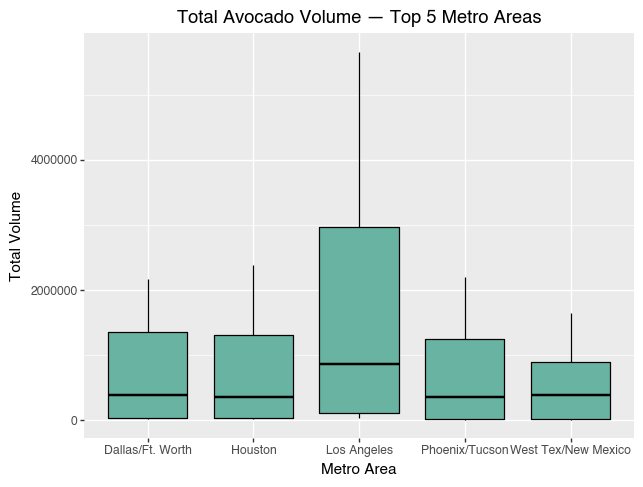

In [ ]:


from plotnine import ggplot, aes, geom_boxplot, labs, theme, element_text, facet_wrap, position_dodge, geom_bar, scale_y_continuous,geom_point,geom_smooth

df_top5 = df_metro[df_metro["Geography"].isin(highest5.index)]
(
    ggplot(df_top5, aes(x="Geography", y="Total Volume")) +
    geom_boxplot(fill="#69b3a2", color="black") +
    labs(title="Total Avocado Volume — Top 5 Metro Areas",
         x="Metro Area", y="Total Volume") 
   )






### 6.

In [ ]:

california_regions = ["Los Angeles", "San Diego", "Sacramento", "San Francisco"]

df_california = df[df["Geography"].isin(california_regions)]






,Date,Average Price,Total Volume,Small 4046,Medium 4225,Large 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Type,Year,Geography,geo_type,Month,Day
44,2015-01-04,0.85,2682160,1838000,524431,64226,255504.05,215572,36982,2951,conventional,2015,Los Angeles,metro,1,4
45,2015-01-04,1.25,54496,47722,1724,0,5050.63,5051,0,0,organic,2015,Los Angeles,metro,1,4
80,2015-01-04,1.05,430139,110694,270108,9738,39600.08,39601,0,0,conventional,2015,Sacramento,metro,1,4
81,2015-01-04,1.33,9214,3728,4328,0,1158.45,1159,0,0,organic,2015,Sacramento,metro,1,4
82,2015-01-04,0.94,461608,244153,165300,15303,36852.99,30885,5595,374,conventional,2015,San Diego,metro,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33018,2020-11-29,1.43,23532,3304,2058,0,18170.66,18145,27,0,organic,2020,Sacramento,metro,11,29
33019,2020-11-29,1.12,469357,104510,19989,7211,337647.81,189342,127702,20605,conventional,2020,San Diego,metro,11,29
33020,2020-11-29,1.95,25800,895,839,0,24067.21,9692,14376,0,organic,2020,San Diego,metro,11,29
33021,2020-11-29,1.50,644142,128556,136719,5598,373270.49,159277,207761,6234,conventional,2020,San Francisco,metro,11,29


### 7.

In [196]:

summary = (
    df_california.groupby(["Geography", "Type"])["Average Price"]
    .agg(mean="mean", median="median", std="std", n="count")
)

#(chatgpt help)
summary["mean_diff"] = summary.groupby("Geography")["mean"].transform(lambda x: x.max() - x.min())

summary


mean  median  std    n  mean_diff
Geography     Type                                           
Los Angeles   conventional  1.05    1.02 0.23  306       0.53
              organic       1.57    1.58 0.31  306       0.53
Sacramento    conventional  1.30    1.26 0.22  306       0.58
              organic       1.87    1.84 0.29  306       0.58
San Diego     conventional  1.11    1.09 0.24  306       0.68
              organic       1.80    1.80 0.33  306       0.68
San Francisco conventional  1.40    1.39 0.27  306       0.72
              organic       2.12    2.06 0.40  306       0.72

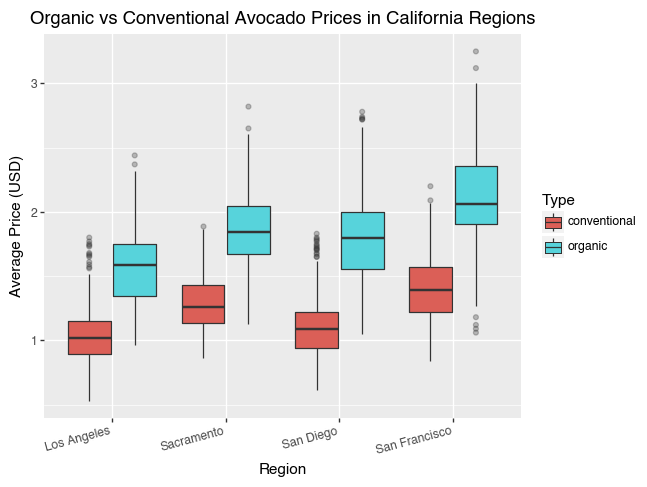

In [197]:
#(chat gpt help with visual layout/colors)
(
    ggplot(df_california, aes(x="Geography", y="Average Price", fill="Type")) +
    geom_boxplot(outlier_alpha=0.3, position=position_dodge(width=0.8)) +
    labs(title="Organic vs Conventional Avocado Prices in California Regions",
         x="Region", y="Average Price (USD)") +
    theme(axis_text_x=element_text(rotation=15, hjust=1))
)

### The city where there is the biggest difference in price between organic and convetional avocados is San Fransico. We observed the highest difference in means which came out to be 0.72

### 8.

/Users/bastiaanweststrate/Desktop/GSB 544/.venv/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_bar : Removed 2 rows containing missing values.


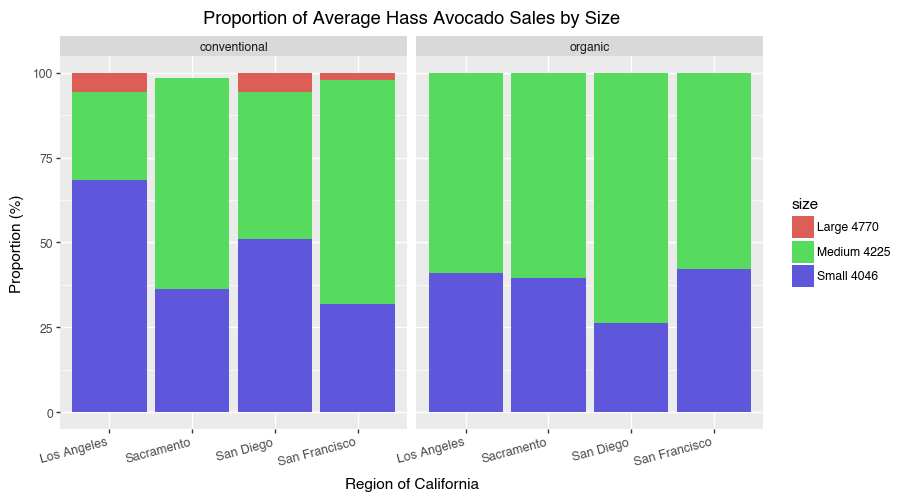

In [198]:
# Chat gpt help
avg_sales = (
    df_california
    .groupby(["Geography", "Type"])[["Small 4046", "Medium 4225", "Large 4770"]]
    .mean()
    .reset_index()
)


avg_sales_long = avg_sales.melt(
    id_vars=["Geography", "Type"],
    var_name="size",
    value_name="avg_sales"
)


avg_sales_long["proportion"] = (
    avg_sales_long.groupby(["Geography", "Type"])["avg_sales"]
    .transform(lambda x: (x / x.sum()) * 100)
)


(
    ggplot(avg_sales_long, aes(x="Geography", y="proportion", fill="size"))
    + geom_bar(stat="identity", position="stack")
    + facet_wrap("~Type")
    + labs(
        title="Proportion of Average Hass Avocado Sales by Size",
        x="Region of California",
        y="Proportion (%)"
    )
    + scale_y_continuous(breaks=[0, 25, 50, 75, 100], limits=[0, 100])
    + theme(
        axis_text_x=element_text(size=9, rotation=15, hjust=1),
        figure_size=(9, 5)
    )
)

### Using outside data

In [199]:
df2 = pd.read_csv("/Users/bastiaanweststrate/Desktop/GSB 544/Sale_Prices_City.csv")

In [214]:
###(chat gpt help getting data to match for join)
cities = ["Los Angeles", "Sacramento", "San Diego", "San Francisco"]

df_house = df2[df2["RegionName"].isin(cities)].copy()


df_house = df_house.rename(columns={"RegionName": "Geography"})


df_house = df_house.drop(columns=["Unnamed: 0", "RegionID", "StateName", "SizeRank"], errors="ignore")


df_house_long = df_house.melt(
    id_vars=["Geography"],
    var_name="Date",
    value_name="House_Price"
)


df_house_long["Date"] = pd.to_datetime(df_house_long["Date"], errors="coerce")
df_house_long["Year"] = df_house_long["Date"].dt.year


df_house_long = df_house_long[["Geography", "Year", "House_Price"]]
df_house_long

cities = ["Los Angeles", "San Diego", "San Francisco", "Sacramento"]

df_california = df[df["Geography"].isin(cities)].copy()


df_california = df_california[df_california["Year"].between(2015, 2020)]
df_house_long = df_house_long[df_house_long["Year"].between(2015, 2020)]

df_joined = pd.merge(
    df_california,
    df_house_long,
    on=["Geography", "Year"],
    how="inner"
)

df_joined = df_joined.dropna(subset=["House_Price"])

df_joined.head()


,Date,Average Price,Total Volume,Small 4046,Medium 4225,Large 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Type,Year,Geography,geo_type,Month,Day,House_Price
0,2015-01-04,0.85,2682160,1838000,524431,64226,255504.05,215572,36982,2951,conventional,2015,Los Angeles,metro,1,4,474100.00
1,2015-01-04,0.85,2682160,1838000,524431,64226,255504.05,215572,36982,2951,conventional,2015,Los Angeles,metro,1,4,482000.00
2,2015-01-04,0.85,2682160,1838000,524431,64226,255504.05,215572,36982,2951,conventional,2015,Los Angeles,metro,1,4,485700.00
3,2015-01-04,0.85,2682160,1838000,524431,64226,255504.05,215572,36982,2951,conventional,2015,Los Angeles,metro,1,4,491700.00
4,2015-01-04,0.85,2682160,1838000,524431,64226,255504.05,215572,36982,2951,conventional,2015,Los Angeles,metro,1,4,489000.00


In [215]:
summary = (
    df_joined.groupby(["Geography", "Year"])
    .agg(
        avg_avocado_price=("Average Price", "mean"),
        total_volume=("Total Volume", "mean"),
        house_price=("House_Price", "mean")
    )
)
summary.head()


avg_avocado_price  total_volume  house_price
Geography   Year                                              
Los Angeles 2015               1.15    1425199.46    493125.00
            2016               1.08    1568676.47    530608.33
            2017               1.38    1495105.86    568141.67
            2018               1.39    1540428.64    638983.33
            2019               1.48    1568871.73    706516.67

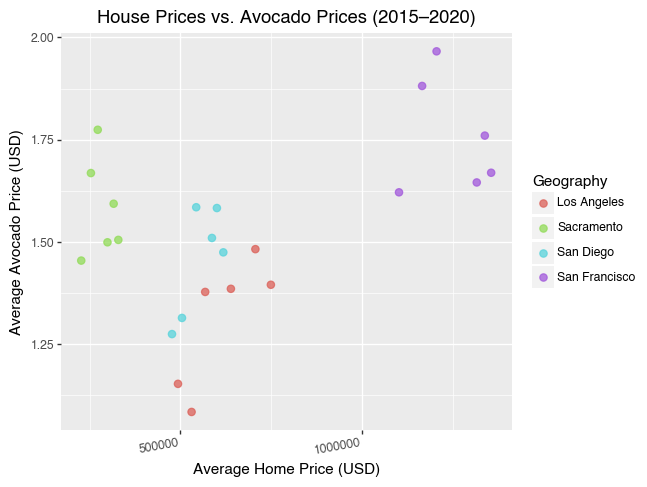

In [212]:
s = summary.reset_index() if isinstance(summary.index, pd.MultiIndex) else summary.copy()
s = s.dropna(subset=["house_price", "avg_avocado_price"]) #(chatgpt help getting summary data ready for plot)


(
    ggplot(s, aes(x="house_price", y="avg_avocado_price", color="Geography"))
    + geom_point(size=2.5, alpha=0.75)
    + labs(
        title="House Prices vs. Avocado Prices (2015–2020)",
        x="Average Home Price (USD)",
        y="Average Avocado Price (USD)"
    )
    + theme(axis_text_x=element_text(rotation=10, hjust=1))
)



### The plot shows that cities with higher house prices, like San Francisco, also tend to have higher avocado prices. In cheaper areas like Sacramento, both housing and avocado prices are lower. This suggests that the two move together mainly because of overall cost of living differences in each region.